# In the name of Allah

Artificial Intelligence computer assignment #1 report

Name: Seyyed Mohammad Jazayeri

Student ID:810101399

Genetic algorithms

Purpose of this project: the main goal of this project is applying genetic algorithms to a dataset and trying get the optimized answer for the knapsack problem.

In this project we're given a data set of different items of food and their available weught and how much value they hold, now using this info we must try and solve the knapsack problem. the solution of this problem could be so time cosuming and maybe we can use a suboptimal answer instead of the optimal answer so in this case we're using genetic algorithms to get an acceptable answer in little time.

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

in this section I declared the hyper-parameters which are crucial all throughout the coding process

*note: I used to have a variable CS_penalty which stands for constraint satisfaction penalty. the purpose of this variable was to add it to those who did not satisfy the constraint so they'd wind up with a negative fitness, but I don't use it anymore and only set said chromosomes' fitness to zero.

*note 2:I had a variable diff_of_change which deterined how much I should change the weight of items in function mutate.

*note3: variables P_m and P_c are the probability of mutation and crossover which means if I choose two chromosomes they'll be crossovered with the probability of P_c and a chromosome will be mutated with the probability of P_m otherwise they go into the next generation as they are.

*note4: the variable limit is to control if we're making any progress or no. it's sort of the answer of the last question.

In [34]:
# defining the hyper-parameters.
P_m = 0.25
P_c = 0.7
limit = 250
#CS_penalty = -100
float_precision = 1
#diff_of_change = 0.2
num_of_population = 250
percentage_of_population_satisfying_constraints = 0.8
df = pd.read_csv('snacks.csv')
max_weight = int(input())
min_val = int(input())
min_of_food = int(input())
max_of_food = int(input())

10
20
2
4


this function adds a ratio column in which I store the value each unit of weight possesses.

this variable will come in handy later.

In [35]:
def rate(val, weight):
  return val/weight
df['ratio'] = list(map(rate, df['Value'], df['Available Weight']))
print(df)

            Snack  Available Weight  Value     ratio
0          MazMaz                10     10  1.000000
1   Doogh-e-Abali                15     10  0.666667
2            Nani                 5      5  1.000000
3            Jooj                 7     15  2.142857
4         Hot-Dog                20     15  0.750000
5           Chips                 8      6  0.750000
6        Nooshaba                12      8  0.666667
7        Shokolat                 6      7  1.166667
8       Chocoroll                 9     12  1.333333
9         Cookies                11     11  1.000000
10        Abnabat                 4      4  1.000000
11   Adams-Khersi                14      9  0.642857
12        Popcorn                16     13  0.812500
13         Pastil                 3      7  2.333333
14       Tordilla                10      9  0.900000
15       Masghati                 5      6  1.200000
16        Ghottab                 7     10  1.428571
17   Saghe-Talaei                 9     11  1.

here I create my first population.

the size of each chromosome is in the permitted range.

then I take a few random items and take a ratio of the weight and value of the chosen items.

finally I append this gene to my population.

In [36]:
# defining chromosomes. and creating population.
import copy
population = []
for i in range(num_of_population):
  size = random.randint(min_of_food, max_of_food)
  temp = random.sample(range(0, int(len(df))), size)
  temp = list(set(temp))
  sample = []
  for i in range(size):
    name = df['Snack'][temp[i]]
    weight = df['Available Weight'][temp[i]] * round(random.uniform(0, 1), float_precision+1)
    val = df['Value'][temp[i]] * weight / df['Available Weight'][temp[i]]
    sample.append([name, round(val, float_precision), round(weight, float_precision)])
  population.append([copy.deepcopy(sample), 0])
  sample.clear()

In this part I have three Important function, all of which contributing to fitness calculation.

the first function check if the chromosome satisfies the constraints, we have three constraints: 1.items must be in the permitted range. 2. sum of weight must be less or equal to the maximum weight. 3. sum of value must be equal or more than the minimum value.

the first condition is always met because of the last part.

in the second function I sum the value of the items in each chromosome to calculate the fitness. I have defined the fitness as : sum of value - minimum value.

Initially I had defined the fitness as : (sum of value - minimum value) + (maximum weight - weight) but I changed my mind because I realised the objective of the knapsack problem is to maximize the value while keeping the weight in permitted range.

In the third function I start measuring the fitness of each chromosome using the last two function, first I sum the value then check if the chromosome satisfies the constraints I assign the aforementioned value to its poits else I set its points to zero to mark it as a member of the population which doesn't satisfy the constraints.

In [37]:
# defining fitness function.
def check_constraints(sample):
  weight = 0
  value = 0
  for i in range(len(sample[0])):
    weight = weight + sample[0][i][2]
    value = value + sample[0][i][1]

  if weight > max_weight or value < min_val:
    return True
  else:
    return False

def sum_of_weight_val(sample):
  val = 0
  for i in range(len(sample[0])):
    val += sample[0][i][1]
  return (val - min_val)
  #return ((val - min_val) * val_inflation) + ((max_weight - weight) * weight_inflation)
def calc_fitness(population):
  for i in range(len(population)):
    points = sum_of_weight_val(population[i])
    if (check_constraints(population[i])):
      points = 0
    population[i][1] = points

calc_fitness(population)
population = sorted(population, key= lambda x: x[1], reverse=True)

In this part I have the crossover functions.

at first the crossover procedure only consisted of the swap part but then I added the no swap part as well, after that I added a probability of selection for each chromosome, the higher their points the more chance they have of being crossovered. I will explain the reasons of these change in the next parts but for now let's focus on the functions.

the swap function takes two chromosomes and takes one item of each randomly and swaps those items but before doing so it makes sure the chromosome doesn't have the item to be swapped otherwise it calls off the whole procedure.

Now the no swap function is like the previous function but does no swapping one of the samples is chosen and gives one of its items to the other one without reciprecation. during this procedure we have to be cautious not to go outside the permitted range of items and to put a  **new** item in the sample.

the crossover function chooses one of the aforementioned functions and passes the samples the attempts variable enables us to have multiple swaps hence the n-point crossover.

The function weighted_sample_without_replacement is used to pick **k** samples from the population with their chances of selction being their points and without replacement.

Finally the last function generates the chances passes them on to the weighted_sample_without_replacement function and then performs crossover on the returned group.

The **divisor** variable here determines what percentage of the population I perform crossover on because we can't take all of them because of their points and their violation of the constraint.

In [38]:
# crossover function
def swap(sample1, sample2):
      flag = False
      index = random.randint(0, len(sample1)-1)
      for i in range(len(sample2)):
        if sample1[index][0] == sample2[i][0]:
          flag = True
      if flag == False:
        random_index = random.randint(0, len(sample2)-1)
        for i in range(len(sample1)):
          if sample2[random_index][0] == sample1[i][0]:
            flag = True
        if flag == False:
          temp = sample1[index]
          sample1[index] = sample2[random_index]
          sample2[random_index] = temp
def no_swap(sample1, sample2):
  flag = False
  coin = random.choices([0, 1], [0.5, 0.5], k=1)
  if coin[0] == 0:
    if len(sample1) > min_of_food and len(sample2) < max_of_food:
      index = random.randint(0, len(sample1)-1)
      temp = sample1.pop(index)
      for i in range(len(sample2)):
        if temp[0] == sample2[i][0]:
          flag = True
      if flag == False:
        sample2.append(temp)
  else:
    if len(sample2) > min_of_food and len(sample1) < max_of_food:
      index = random.randint(0, len(sample2)-1)
      temp = sample2.pop(index)
      for i in range(len(sample1)):
        if temp[0] == sample1[i][0]:
          flag = True
      if flag == False:
        sample1.append(temp)
def crossover(sample1, sample2):
  attempts = 0
  allowed_attempts = 2
  while attempts < allowed_attempts:
    weights = [P_c, 1-P_c]
    coin = random.choices([0, 1], weights, k=1)
    if coin[0] == 0:
      coin2 = random.choices([0, 1], weights, k=1)
      if coin2[0] == 0:
        swap(sample1, sample2)
      else:
        no_swap(sample1, sample2)
      attempts += 1
def weighted_sample_without_replacement(population, weights, k):
    weights = list(weights)
    positions = range(len(population))
    indices = []
    while True:
        needed = k - len(indices)
        if not needed:
            break
        for i in random.choices(positions, weights, k=needed):
            if weights[i]:
                weights[i] = 0.0
                indices.append(i)
    return [population[i] for i in indices]
def new_crossover(population, divisor):
  weights = [population[i][1] + 1 for i in range(len(population))]
  chosen = weighted_sample_without_replacement(population, weights, k=num_of_population//divisor)
  for i in range(len(chosen)-1):
    crossover(chosen[i][0], chosen[i+1][0])

In the beginning I only had the mutate function and all it did was randomly change the weight of one item but that did not work out well, so I decided to make mutate1 this function takes a sample then randomly and with equal chance does one of the two:


1. It checks if the sample can take another item and still be in the permitted range **AND** if it's weight is less than the max weight. if the sample is so it picks a new item from the list by chance and the weights being their ratio (this is where it comes in handy) and adds it to the sample to either fill it (weight-wise) or run out of the item.
2. On the other hand it checks if the sample can lose an item and still be in the permitted range becuase here we want to delete an item, but which one? the answer is the one with the least ratio and replace it with another one like mentioned in the first section but we could choose an item which already exists hence the check in the beginning either way it's a win-win.



In [39]:
# mutation function.
def mutate(sample):
  weights = [P_m, 1-P_m]
  coin = random.choices([0, 1], weights, k=1)
  if coin[0] == 0:
    sum_weight = 0
    for i in range(len(sample)):
      sum_weight += sample[i][2]
    coin2 = random.choices([0, 1], [0.5, 0.5], k=1)
    coin3 = random.randint(0, len(sample)-1)
    ratio = df.loc[df['Snack'] == sample[coin3][0]]
    ratio = ratio.set_index('Snack')
    avail_weight = ratio['Available Weight'][sample[coin3][0]]
    ratio = ratio['ratio'][sample[coin3][0]]
    if sum_weight > max_weight:
      min = sample[0][1]/(sample[0][2]+1)
      index = 0
      for i in range(len(sample)):
        if (sample[i][1]/(sample[i][2]+1)) < min:
          min = sample[i][1]/(sample[i][2]+1)
          index = i
      sample.pop(i)
      weights = [df['ratio'][i] for i in range(len(df))]
      indecies = [i for i in range(len(df))]
      food = random.choices(indecies, weights, k=1)
      name = df['Snack'][food[0]]
      flag = False
      for i in range(len(sample)):
        if sample[i][0] == name:
          flag = True
      if flag == False:
        weight = df['Available Weight'][food[0]] * round(random.uniform(0, 1), float_precision+1)
        val = df['Value'][food[0]] * weight / df['Available Weight'][food[0]]
        sample.append([name, round(val, float_precision), round(weight, float_precision)])
    else:
      max = 0
      index = 0
      for i in range(len(sample)):
        if sample[i][1] / (sample[i][2] + 1) > max:
          max = sample[i][1] / (sample[i][2] + 1)
          index = i
      ratio = df.loc[df['Snack'] == sample[index][0]]
      ratio = ratio.set_index('Snack')
      avail_weight = ratio['Available Weight'][sample[index][0]]
      ratio = ratio['ratio'][sample[index][0]]
      difference = 0
      if avail_weight > max_weight - sum_weight:
        difference = max_weight - sum_weight
      else:
        difference = avail_weight - sample[index][2]
        sample[index][2] += difference
        sample[index][1] += ratio * difference
      #sample[coin3][2] += max_of_food - sum_weight
      #sample[coin3][1] += ratio * (max_of_food - sum_weight)

def mutate1(sample):
  weights = [P_m, 1-P_m]
  coin = random.choices([0, 1], weights, k=1)
  if coin[0]== 0:
    sum_weight = 0
    for i in range(len(sample)):
      sum_weight += sample[i][2]
    if len(sample) < max_of_food and sum_weight < max_weight:
      weights = [df['ratio'][i] for i in range(len(df))]
      indecies = [i for i in range(len(df))]
      food = random.choices(indecies, weights, k=1)
      name = df['Snack'][food[0]]
      flag = False
      for i in range(len(sample)):
        if sample[i][0] == name:
          flag = True
      if flag == False:
        if max_weight - sum_weight <= df['Available Weight'][food[0]]:
          weight = max_weight - sum_weight
        else:
          weight =  df['Available Weight'][food[0]]
        val = df['Value'][food[0]] * weight / df['Available Weight'][food[0]]
        sample.append([name, round(val, float_precision), round(weight, float_precision)])
  else:
    if len(sample) > min_of_food:
      min = sample[0][1]/(sample[0][2]+1)
      index = 0
      for i in range(len(sample)):
        # print('-----------------------------------')
        # print(sample[i][1], sample[i][2])
        # print('-----------------------------------')
        if (sample[i][1]/(sample[i][2]+1)) < min:
          min = sample[i][1]/(sample[i][2]+1)
          index = i
      sample.pop(index)
      weights = [df['ratio'][i] for i in range(len(df))]
      indecies = [i for i in range(len(df))]
      food = random.choices(indecies, weights, k=1)
      name = df['Snack'][food[0]]
      flag = False
      for i in range(len(sample)):
        if sample[i][0] == name:
          flag = True
      if flag == False:
        sum_weight = 0
        for i in range(len(sample)):
          sum_weight += sample[i][2]
        if max_weight - sum_weight <= df['Available Weight'][food[0]]:
          weight = max_weight - sum_weight
        else:
          weight = df['Available Weight'][food[0]]
        if weight < 0:
          pass
        else:
          val = df['Value'][food[0]] * weight / df['Available Weight'][food[0]]
          sample.append([name, round(val, float_precision), round(weight, float_precision)])

This is the final part of the code.

First I take one-third of the population and do crossover on them. then I mutate some of them, and then I sort them based on their fitness and count the ones which satisfy the constraints and I also calculate the mean of the generation and I also take the max of each generation, finally I append each one to its corresponding list.

this loop only ends when we have reached the desired percentage of those that satisfy our constraints.

[[['Jooj', 15.0, 7.0], ['Pastil', 7.0, 3.0]], 2.0]


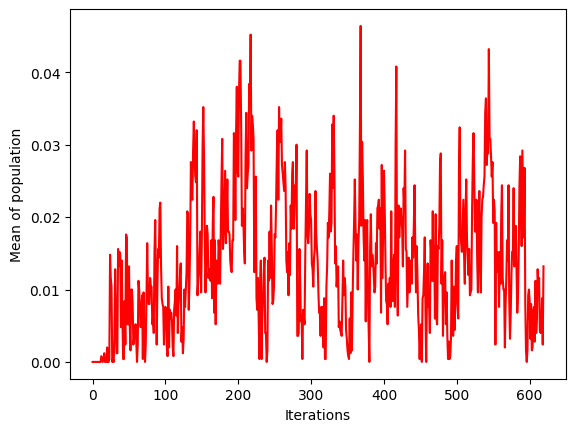

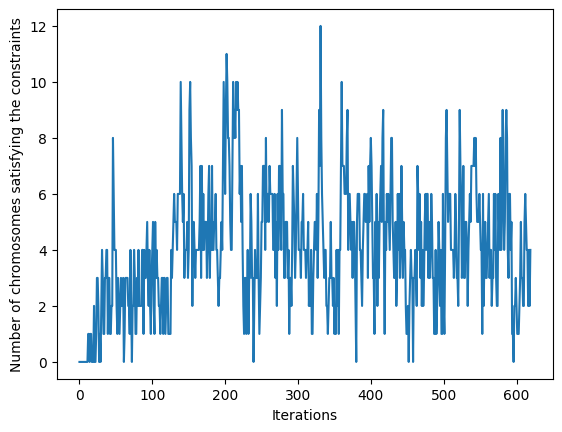

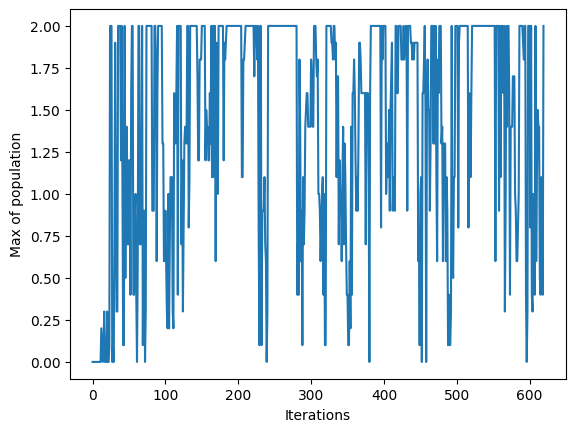

[[[['Jooj', 15.0, 7.0], ['Pastil', 7.0, 3.0]], 2.0], [[['Pastil', 6.8, 2.9], ['Jooj', 11.8, 5.5], ['Ghottab', 2.3, 1.6]], 0.9000000000000021], [[['Jooj', 15.0, 7.0], ['Pastil', 4.4, 1.9], ['Chips', 0.8, 1.1]], 0.1999999999999993], [[['Jooj', 10.7, 5.0], ['Pastil', 6.1, 2.6], ['Ghottab', 3.4, 2.4]], 0.19999999999999574], [[['Jooj', 11.8, 5.5], ['Chocoroll', 2.5, 1.9]], 0], [[['Pastil', 7.0, 3], ['Ghottab', 2.1, 1.5]], 0], [[['Pastil', 7.0, 3], ['Abnabat', 1.1, 1.1]], 0], [[['Pastil', 6.8, 2.9], ['Jooj', 12.4, 5.8]], 0], [[['Jooj', 12.0, 5.6], ['Pastil', 5.4, 2.3]], 0], [[['Pastil', 7.0, 3], ['Jooj', 11.8, 5.5], ['Nooshaba', 1.0, 1.5]], 0], [[['Jooj', 13.9, 6.5], ['Doogh-e-Abali', 2.5, 3.7]], 0], [[['Jooj', 11.8, 5.5], ['Pastil', 2.3, 1.0]], 0], [[['Jooj', 15.0, 7], ['Ghottab', 6.3, 4.4]], 0], [[['Pastil', 6.5, 2.8], ['Jooj', 9.2, 4.3], ['Popcorn', 2.4, 2.9]], 0], [[['Pastil', 3.0, 1.3], ['Jooj', 7.9, 3.7], ['Popcorn', 4.1, 5.0]], 0], [[['Jooj', 10.1, 4.7], ['Abnabat', 4.0, 4], ['Chocoro

In [40]:
counter = 0
new_max = population[0][1]
means = []
good = []
maxes = []
havent_reached_max = 0
while True:
  sum = 0
  ok = 0
  #random.shuffle(population)
  new_crossover(population, 3)
  for i in range(len(population)):
    mutate1(population[i][0])
  calc_fitness(population)
  population = sorted(population, key= lambda x: x[1], reverse=True)
  for i in range(len(population)):
    if population[i][1] > 0:
      ok += 1
    else:
      break
  good.append(ok)
  new_max = population[0][1]
  maxes.append(new_max)
  counter += 1
  for i in range(len(population)):
    sum += population[i][1]
  sum /= len(population)
  means.append(sum)
  if ok/num_of_population >= percentage_of_population_satisfying_constraints:
    break
  if sum < max(means):
    havent_reached_max += 1
  else:
    havent_reached_max = 0
  if havent_reached_max > limit:
    break
print(population[0])
x_axis = np.arange(0, counter, 1)
plt.plot(x_axis, means, color='r')
plt.xlabel('Iterations')
plt.ylabel('Mean of population')
plt.show()
plt.plot(x_axis, good)
plt.xlabel('Iterations')
plt.ylabel('Number of chromosomes satisfying the constraints')
plt.show()
plt.plot(x_axis, maxes)
plt.xlabel('Iterations')
plt.ylabel('Max of population')
plt.show()
print(population)

Above we can see the plot of the mean, number of population that satisfy the constraint and max of each genaration

Except for the max plot the other two are almost increasing but after a certain point they keep oscillating up and down and it is as if they cannot go any higher which makes sense because the whole procedure is random and if we want the whole plot to be increasing we will be decreasing the element of randomness which is not our goal.

but for the max plot its behaviour is really hard to articulate, I mean it increases then decreases and it is really unpredictable but that is also reasonable because the goal of genetic algorithms is to create a good generation out of a random population and not to get the best possible answer, of course these two are inseparable but we have to choose one, and we choose the first one.

# ANSWERS OF QUESTION
1. if our population is very small crossover won't help us very much and we need mutation which basically changes the population step by step and gradually so in other words we are changing the population.
on the other hand if our population is too big there's a great chance we'll have a lot of great answers in our first generation, another problem is the time this would consume which is a big downside becaus the whole point of using genetic algorithms in optimazation problems is to get to an acceptable sub-optimal problem with little time, so this is basically defeating the purpose.

2. in this case it's pretty clear the algorithms will slow down but as for accuracy, it will be decreased as well because the algorithm is assuming that in each generation the chhromosomes are getting better and less random but adding more to the population is in contradiction with this assumption and this will be confuse the algorithm and we can't count on it to generate good acceptable answers.

3. crossover helps to diversify the population but doesn't change the weight or value of anything but on the other hand mutation changes some chromosomes and helps us overcome obstacles due to our hands being tied with changing anything about the samples.
we can't use only one of them because if we only crossover the chromosomes we will stop pretty soon because after some generations no matter how big our initial population our hands will be tied because we can't change the parameters.
and if we only use mutation we'll only be changing quantities of each sample and never mixing them together and since this is a random procedure we don't know if we'll reach a good population.
so we could conclude that mutation and crossover are each others' complements.

4. we could fill our knapsack with those items which possess the most value per one unit of weight but this contradicts randomness.
another good idea would be to perform crossover only on the good ones and mutation on the rest so our good answers will have little chance of being altered into something bad and do unbounded experiments on the bad ones which again is not necessarily a way to a good population.

5. because after a few cycles the problems of each chromosome will be very specific and detailed and we'd need a lot of information about each chromosome which can be very time-consuming. this situation kind of neutralizes the effect of our algorithm and maybe even reverses it.
to solve this problem maybe we could alter the probabilities of mutation and crossover in the middle of the execution of the algorithm to serve us best.

6. let's assume we're trying to get the parameter X to a certain amount and there's no way we could do that, we have to keep track of this variable's mean in the population and if we detect that we haven't been able to get it to its previous maximum value or more for quite some iterations we must end the algorithm because it seems like we're going nowhere.

In [ ]:
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")

Saving AI_CA0 (1).ipynb to AI_CA0 (1).ipynb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>